In [ ]:
import numpy as np
import random

descuento = 0.8  # gamma
tasa_aprendizaje = 0.5  # alfa
estado_final = 5

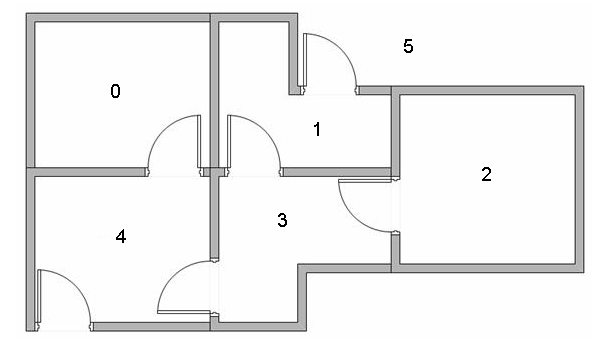

In [ ]:
recompensas = np.array([[-1., -1., -1., -1., 0., -1.],
                        [-1., -1., -1., 0., -1., 100.],
                        [-1., -1., -1., 0., -1., -1.],
                        [-1., 0., 0., -1., 0., -1.],
                        [0., -1., -1., 0., -1., 100.],
                        [-1., 0., -1., -1., 0., 100.]])

Q = np.zeros_like(recompensas)


In [ ]:
print(Q)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
def qlearning(s, a):
    max_q = max(Q[a])  # Valor máximo de Q para el próximo estado a

    nuevo_q = Q[s][a] + tasa_aprendizaje * (recompensas[s][a] + descuento * max_q - Q[s][a])
    Q[s][a] = nuevo_q
    return

In [ ]:
for _ in range(1000):
    estado_actual = random.randint(0, 5)
    while estado_actual == estado_final:
        estado_actual = random.randint(0, 5)

    mantener = True
    while mantener:
        accion = random.randint(0, 5)
        while recompensas[estado_actual][accion] == -1:
            accion = random.randint(0, 5)
        qlearning(estado_actual, accion)
        estado_actual = accion
        if estado_actual == estado_final:
            mantener = False

print(Q)

[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [ 64.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.    0.    0.    0. ]]


In [ ]:
def encontrar_camino_optimo(inicio):
    camino_optimo = [inicio]
    estado_actual = inicio

    while estado_actual != estado_final:
        accion_optima = np.argmax(Q[estado_actual])
        estado_actual = accion_optima
        camino_optimo.append(estado_actual)

    return camino_optimo

inicio = 3  # Estado inicial deseado
camino_optimo = encontrar_camino_optimo(inicio)
print("Camino óptimo desde el estado", inicio, "hasta el estado", estado_final, ":")
print(camino_optimo)

Camino óptimo desde el estado 3 hasta el estado 5 :
[3, 1, 5]
